# Udacity Deep RL NanoDegree - Project 2 - Continuous Control
---
In this notebook, we will implement a Deep Deterministec Policy Gradient (DDPG) agent to solve the Unity ML-Agents environment about two agents controlling rackets to bounce a ball over a net, somewhat like playing Ping-Pong.

### 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import time
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 3. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of **`+0.1`**.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of **`-0.01`**.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of **`8`** variables corresponding to the position and velocity of the ball and racket, the environment returns 3 stacked observation spaces at each timestep, son the returned variable has dimension **`24`**. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


Finally, Instantiate the agent and load the Neural Network to memory.

In [5]:
# Import the DDPG agent
from ddpg_agent import Agent

# Instantiate the Agent
agent = Agent(state_size=24, action_size=2, random_seed=1)

### 4. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.

In [6]:
## Select which racket to print information about. 0: Right Racket, 1: Left Racket.
racket = 0
# The observation space has 3 stacks of 8x1 vectors of observation. Choose which of them you want to print.
stack = 0

# Run 10 episodes and choose random actions
for i in range(50):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
            
        # Print the observation space as (Racket X position, Racket Y position, Racket X velocity, Racket Y velocity, Ball X position, Ball Y position)
        print('\rx:{:5.3}\ty:{:5.3}\tvx:{:5.3}\tvy:{:5.3}\tbx:{:5.3}\tby:{:5.3}               '.format(states[racket][stack*8 + 0], states[racket][stack*8 + 1], states[racket][stack*8 + 2], states[racket][stack*8 + 3], states[racket][stack*8 + 4], states[racket][stack*8 + 5]), end="", flush=True)

### 5. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.



/home/said/.anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode: 100 (0.21s)	Score: 0.00	Moving Average Score: 0.00       
Episode: 200 (0.22s)	Score: 0.00	Moving Average Score: 0.00       
Episode: 300 (0.22s)	Score: 0.00	Moving Average Score: 0.00       
Episode: 400 (0.24s)	Score: 0.00	Moving Average Score: 0.01       
Episode: 500 (0.54s)	Score: 0.00	Moving Average Score: 0.02       
Episode: 600 (0.82s)	Score: 0.10	Moving Average Score: 0.04       
Episode: 700 (0.47s)	Score: 0.09	Moving Average Score: 0.08       
Episode: 800 (1.52s)	Score: 0.20	Moving Average Score: 0.15        
Episode: 900 (0.27s)	Score: 0.00	Moving Average Score: 0.18        
Episode: 954 (10.53s)	Score: 1.69	Moving Average Score: 0.51       
Environment solved in 954 episodes! Max Average Score over 100 episodes: 0.51
Episode: 1000 (5.41s)	Score: 0.80	Moving Average Score: 1.01       


Training finished:
	[+] Total nuber of episodes:    1000
	[+] Best 100-average score:     1.01
	[+] Best individual game score: 2.70
Task solved in 954 Episodes!


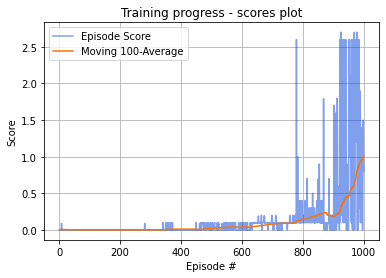

In [7]:
def ddpg(n_episodes=1000, print_every=100):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes  (int): maximum number of training episodes
        print_every (int): How many episodes pass between each print.
    """
    # Queue to store the last 100 max scores, the then plot a moving average.
    scores_deque = deque(maxlen=100)
    # Full score list to return and later plot.
    scores = []
    # List of the mivong avergare score over 100 episodes, to plot later.
    moving_avg_score = []
    # Define a finish flag for the learning task, a best score tracker, 
    finished_learning = False
    solved_in = -1
    
    for i_episode in range(1, n_episodes+1):        
        # Restart the Environment in train mode 
        env_info = env.reset(train_mode=True)[brain_name]
        # Get the initial state
        states = env_info.vector_observations
        rr_state = states[0]                                    # Separate right racket state
        lr_state = states[1]                                    # Separate Left racket state
        # Reset the agents
        agent.reset()
        # Set the score of each agent to 0
        score = np.zeros(num_agents)

        # Start a timer to see how long the episode took:
        t_start = time.time()
            
        while(True):
            ## Select Actions per racket.
            rr_action = agent.act(rr_state)                    # get the action of the left racket.   
            lr_action = agent.act(lr_state)                    # get the action of the right racket.
            # Join the actions into a single vector to pass to the environment
            actions = np.vstack([rr_action, lr_action])
            
            # Step the Environment and gather all the information of the timestep
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            
            # Separate the state for the Right and Left Racket.
            next_states = env_info.vector_observations         # get next state (for each agent)
            rr_next_state = next_states[0]                     # Separate right racket state
            lr_next_state = next_states[1]                     # Separate Left racket state
        
            # Separate rewards by racket 
            rewards = env_info.rewards                         # get reward (for each agent)
            rr_reward = rewards[0]
            lr_reward = rewards[1]
            
            # Separate dones by racket
            dones = env_info.local_done                        # see if episode finished
            rr_done = dones[0]
            lr_done = dones[1]
       
            # Add the experience of each racket separate of each other
            agent.step(rr_state, rr_action, rr_reward, rr_next_state, rr_done)
            agent.step(lr_state, lr_action, lr_reward, lr_next_state, lr_done)
            
            # roll over states to next time step
            rr_state = rr_next_state                           
            lr_state = lr_next_state
            
            # update the score (for each agent)
            score += rewards                                   

            # Check if the Episode is over
            if np.any(dones):
                break
         
        # Stop the episode timer
        episode_timer = time.time() - t_start
        
        # Save the max of the two scores between the two rackets.
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        # Also save the current moving average score
        moving_avg_score.append(np.mean(scores_deque))
        
        # Print the current status of the training
        print('\rEpisode: {} ({:4.2f}s)\tScore: {:4.2f}\tMoving Average Score: {:4.2f}       '.format(i_episode, episode_timer, scores[-1], np.mean(scores_deque)), end='')
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode: {} ({:4.2f}s)\tScore: {:4.2f}\tMoving Average Score: {:4.2f}       '.format(i_episode, episode_timer, scores[-1], np.mean(scores_deque)))
            
        # Save the code if the training already succeded    
        if np.mean(scores_deque)>=0.5 and finished_learning == False:
            print('\nEnvironment solved in {:d} episodes! Max Average Score over 100 episodes: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_SUCCESS.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_SUCCESS.pth')
            finished_learning = True
            # Save how many episodes it took to solve the task
            solved_in = i_episode
            
        # Check if the current average is the best of all the averages, and keep updating the  "Success weights" the current best candidate
        if len(moving_avg_score) > 2:
            if moving_avg_score[-1] > np.max(moving_avg_score[:-1]) and moving_avg_score[-1] > 0.5:
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_SUCCESS.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_SUCCESS.pth')
            
    
    ## Print the final results of the training:
    print("\n\nTraining finished:")
    print("\t[+] Total nuber of episodes:    {}".format(n_episodes))
    print("\t[+] Best 100-average score:     {:4.2f}".format(np.max(moving_avg_score)))
    print("\t[+] Best individual game score: {:4.2f}".format(np.max(scores)))
    
    # Check if the task was actually solved
    if solved_in != -1:
        print("Task solved in {} Episodes!".format(solved_in))
    
    
    return scores, moving_avg_score


# Run the training algorithm
scores, moving_avg_score = ddpg()

# Plot the scores and their averages.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, c='xkcd:blue', label = "Episode Score", alpha=0.5)
plt.plot(np.arange(1, len(scores)+1), moving_avg_score, c='xkcd:orange', label = "Moving 100-Average")

# Set the titles of the plots and axis
plt.title('Training progress - scores plot')
plt.ylabel('Score')
plt.xlabel('Episode #')

# Add grid and legend
plt.grid()
plt.legend()

# Show the plot
plt.show()

### 6. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [8]:
## load the weights from file
# Weights of the Actor
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_SUCCESS.pth'))
# Weights of the Critic
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_SUCCESS.pth'))


# Run 2 episodes one after the other.
for i in range(2):  
    # Restart the Environment
    env_info = env.reset(train_mode=False)[brain_name]
    # Get the initial state
    states = env_info.vector_observations
    # Reset the agents
    agent.reset()
    # Set the score of each agent to 0
    score = np.zeros(num_agents)

    ## Run the Agent
    while(True):
        # Separate the state by racket to feed it separatly to the NN
        rr_state = states[0]                               # Separate right racket state
        lr_state = states[1]                               # Separate Left racket state
        ## Select Actions per racket.
        rr_action = agent.act(rr_state, add_noise=False)   # get the action of the left racket.   
        lr_action = agent.act(lr_state, add_noise=False)   # get the action of the right racket.
        # Join the actions into a single vector to pass to the environment
        actions = np.vstack([rr_action, lr_action])
        # Step the Environment and gather all the information of the timestep
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        # Save rewards and state
        states = next_states                               # roll over states to next time step
        score += rewards                                   # update the score (for each agent)

        # Check if the Episode if over
        if np.any(dones):
            break

    ## Print the results
    print('Score (Max over agents) of this episode: {}'.format(np.max(score)))


/home/said/.anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Score (Max over agents) of this episode: 1.2000000178813934
Score (Max over agents) of this episode: 1.3000000193715096


Finally, close the environment.

In [9]:
env.close()